In [1]:
import numpy as np
import copy
import networkx as nx

with open("data.txt") as file:
    data = file.read().splitlines()

data = np.array([list(a) for a in data])

In [9]:
dirs = [(0,1), (0,-1), (1, 0), (-1,0)]

arrows = {
    '>' : (0,1),
    'v' : (1,0)
}

def get_neighbours(y, x, data):

    neighs = []
    dim = data.shape
    sign = data[y, x]

    if sign in arrows.keys():
        neighs.append((y + arrows[sign][0], x + arrows[sign][1]))
    else:
        for dir in dirs:
            new_cord = (y + dir[0], x + dir[1])

            if new_cord[0] >= 0 and new_cord[0] < dim[0] and new_cord[1] >= 0 and new_cord[1] < dim[1]:

                if data[new_cord[0], new_cord[1]] == "v" and dir == (-1,0):
                    pass
                elif data[new_cord[0], new_cord[1]] == ">" and dir == (0,-1):
                    pass
                else:
                    neighs.append(new_cord)

    neighs = [n for n in neighs if data[n[0], n[1]] != "#"]

    return set(neighs)

def search(data, node, visited, paths):

    visited = copy.copy(visited)
    visited.add(node)

    if node[0] == (data.shape[0] - 1) and node[1] == (data.shape[1] - 2):
        paths.append(list(visited))
    else:
        for adj_node in get_neighbours(*node, data):
            if adj_node in visited: continue
            search(data, adj_node, visited, paths)

    return paths

def find_nodes(data, current_cordinates, visited, prev_cordinate, prev_node, g):

    neighbours = get_neighbours(*current_cordinates, data)
    neighbours = list(set(neighbours) - set([prev_cordinate]))

    steps = 1

    # Walk until finding new node
    while len(neighbours) == 1:
        steps += 1
        prev_cordinate = current_cordinates
        current_cordinates = neighbours[0]

        neighbours = get_neighbours(*current_cordinates, data)
        neighbours = list(set(neighbours) - set([prev_cordinate]))

    # New node encountered
    if len(neighbours) > 1:
        
        node = current_cordinates
        g.add_edge(prev_node, node, weight = steps)

        if node not in visited:
            visited.add(node)
            for n in neighbours:
                find_nodes(data, n, visited, current_cordinates, node, g)

    if len(neighbours) == 0:
        node = current_cordinates
        g.add_edge(prev_node, node, weight = steps)
        visited.add(node)

    return g

In [10]:
paths = search(data, (0,1), set(), list())
max([len(p) - 1 for p in paths])

2294

6418

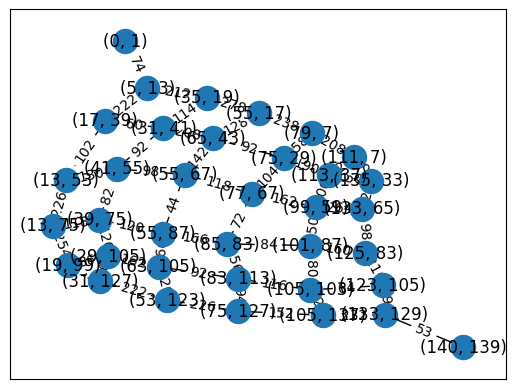

In [11]:
data_2 = data.copy()
data_2[data_2 == ">"] = "."
data_2[data_2 == "v"] = "."

g = find_nodes(data_2, (0,1), set(), (0,0), (0,1), nx.Graph())

nx.draw_networkx(g, nx.spring_layout(g, seed=7))
edge_labels = nx.get_edge_attributes(g, "weight")
_ = nx.draw_networkx_edge_labels(g, nx.spring_layout(g, seed=7), edge_labels)

all_pathes = list(nx.all_simple_paths(g, source=(0,1), target=(data_2.shape[-1] - 1, data_2.shape[-1] - 2)))
all_costs = [nx.classes.path_weight(g, path, weight='weight') - 1 for path in all_pathes]
max(all_costs)